In [78]:
import nltk
import numpy as np
import json

In [121]:
with open('most_recent_old_1200.json') as json_file:  
    data = json.load(json_file)

In [122]:
sentences=[d1["review_text"] for d1 in data]

In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [140]:
classe = []
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    if ss["compound"] > 0.01:
        classe.append("positive")
    elif ss["compound"] < -0.01:
        classe.append("negative")
    else:
        classe.append("neutral")

In [125]:
with open('batterylife.json') as json_file:  
    data_battery = json.load(json_file)
with open('soundquality.json') as json_file:  
    data_sound = json.load(json_file)
with open('valueofmoney.json') as json_file:  
    data_money = json.load(json_file)
with open('fingerprint.json') as json_file:  
    data_finger = json.load(json_file)
with open('picturequality.json') as json_file:  
    data_picture = json.load(json_file)

In [126]:
sentbattery=[d1["review_text"] for d1 in data_battery]
sentsound=[d1["review_text"] for d1 in data_sound]
sentvalue=[d1["review_text"] for d1 in data_money]
sentfinger=[d1["review_text"] for d1 in data_finger]
sentpicture=[d1["review_text"] for d1 in data_picture]

In [198]:
arr=[]
for i in sentences:
    temp=[0,0,0,0,0]
    if i in sentbattery or "battery" in i.lower():
        temp[0]=1
    if i in sentsound or "sound" in i.lower() or "noise" in i.lower() or "speaker" in i.lower():
        temp[1]=1
    if i in sentvalue or "value" in i.lower() or "money" in i.lower():
        temp[2]=1
    if i in sentfinger or "finger" in i.lower():
        temp[3]=1
    if i in sentpicture or "camera" in i.lower() or "picture" in i.lower():
        temp[4]=1
    arr.append(temp)

In [199]:
import pandas as pd
df1 = pd.DataFrame(columns = ["sentence","sentiment","battery_life","sound_quality","value_for_money","fingerprint","picture_quality"])

In [200]:
arr = np.transpose(arr)
ref = ["battery_life","sound_quality","value_for_money","fingerprint","picture_quality"]
for no,i in enumerate(["battery_life","sound_quality","value_for_money","fingerprint","picture_quality"]):
    df1[i] = arr[no]

In [201]:
df1["sentence"] = sentences

In [202]:
df1["sentiment"] = classe

In [212]:
df1[df1[ref[0]]==1][[ref[0],"sentiment"]].groupby("sentiment").agg({ref[0]: 'sum'}).apply(lambda x: 100 * x / float(x.sum()))

,battery_life
sentiment,
neutral,20.0
positive,80.0


In [213]:
df1[df1[ref[1]]==1][[ref[1],"sentiment"]].groupby("sentiment").agg({ref[1]: 'sum'}).apply(lambda x: 100 * x / float(x.sum()))

,sound_quality
sentiment,
positive,100.0


In [214]:
df1[df1[ref[2]]==1][[ref[2],"sentiment"]].groupby("sentiment").agg({ref[2]: 'sum'}).apply(lambda x: 100 * x / float(x.sum()))

,value_for_money
sentiment,
negative,18.181818
positive,81.818182


In [215]:
df1[df1[ref[3]]==1][[ref[3],"sentiment"]].groupby("sentiment").agg({ref[3]: 'sum'}).apply(lambda x: 100 * x / float(x.sum()))

,fingerprint
sentiment,
negative,28.571429
neutral,28.571429
positive,42.857143


In [216]:
df1[df1[ref[4]]==1][[ref[4],"sentiment"]].groupby("sentiment").agg({ref[4]: 'sum'}).apply(lambda x: 100 * x / float(x.sum()))

,picture_quality
sentiment,
negative,21.428571
neutral,7.142857
positive,71.428571


In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

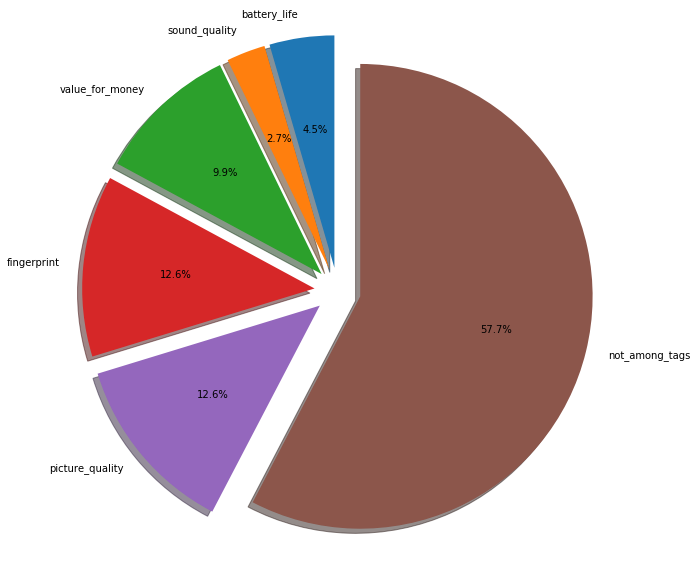

In [233]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "battery_life","sound_quality","value_for_money","fingerprint","picture_quality","not_among_tags"
sizes=[]
for i in labels[:-1]:
    sizes.append(sum(df1[i]))
ctr = 0
for i in arr.T:
    if sum(i) == 0:
        ctr+=1
sizes.append(ctr)
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()